<a href="https://colab.research.google.com/github/iBoxerman/tf-intro/blob/colab/TF_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [8]:
import numpy as np

In [1]:
!pwd
!cd /
!ls -l

/content
total 4
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data


In [2]:
print("Hello world!")

Hello world!


# Celsius To Fhrenheit

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
celsius_q = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)
for i,c in enumerate(celsius_q):
  print(f'{c}^c, {fahrenheit_a[i]}^f')

-40.0^c, -40.0^f
-10.0^c, 14.0^f
0.0^c, 32.0^f
8.0^c, 46.0^f
15.0^c, 59.0^f
22.0^c, 72.0^f
38.0^c, 100.0^f


Assembling layers

In [25]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

Compiling

In [26]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Training

In [27]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


displaying the trainging statistics

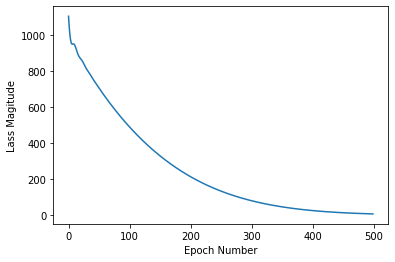

In [28]:
plt.xlabel('Epoch Number')
plt.ylabel('Lass Magitude')
plt.plot(history.history['loss'])

Prediction

In [29]:
print(model.predict([100.0]))

[[211.33823]]


Looking at the layer weights

In [30]:
print(f'These are the layer vars {l0.get_weights()}')

These are the layer vars [array([[1.8201642]], dtype=float32), array([29.3218], dtype=float32)]


# Fashion MNIST

In [11]:
!pip install -U tensorflow_datasets

In [12]:
# tf imports
import tensorflow as tf
import tensorflow_datasets as tf_ds
# other imports
import math
import numpy as np
import matplotlib.pyplot as plt
# for progress bars display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm 

import Fashion MNIST

In [13]:
dataset, metadata = tf_ds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [14]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [15]:
class_names = ['T-short/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Exploring the data

In [16]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset, test_dataset = train_dataset.map(normalize),test_dataset.map(normalize)

Ploting 25 exmaples

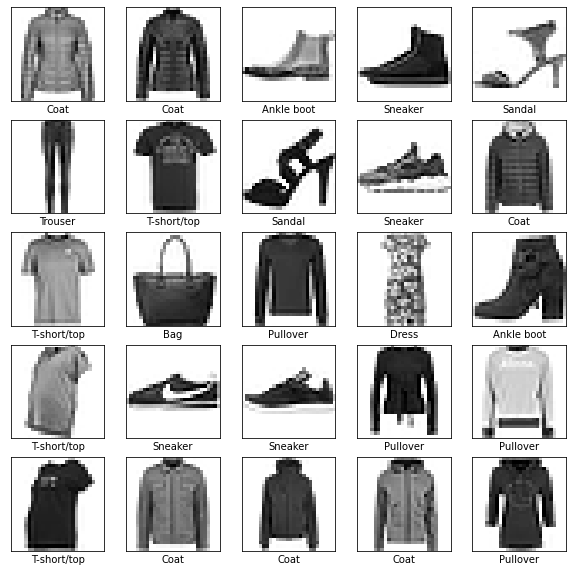

In [17]:
plt.figure(figsize=(10,10))
i=0
for (img,lbl) in test_dataset.take(25):
  img = img.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_names[lbl])
  i+=1
plt.show()

Building the model

In [18]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Compiling

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training

In [20]:
BATCH_SIZE= 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [21]:
epoch_step = math.ceil(num_train_examples/BATCH_SIZE)
model.fit(train_dataset, epochs=5, steps_per_epoch=epoch_step)

Epoch 1/10
1875/1875 [==============================] - 23s 8ms/step - loss: 0.4858 - accuracy: 0.8292
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3738 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3328 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3100 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2876 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2802 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2525 - accuracy: 0.9066
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2440 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

Testing

In [22]:
test_loss, test_acc = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print(f'acc on test datatset: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.3332 - accuracy: 0.8845
acc on test datatset: 0.8845000267028809


Predicting

# CNN

In [23]:
# tf imports
import tensorflow as tf
import tensorflow_datasets as tf_ds
# other imports
import math
import numpy as np
import matplotlib.pyplot as plt
# for progress bars display
import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm 

In [24]:
dataset, metadata = tf_ds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
class_names = ['T-short/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset, test_dataset = train_dataset.map(normalize),test_dataset.map(normalize)


In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE= 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

epoch_step = math.ceil(num_train_examples/BATCH_SIZE)
model.fit(train_dataset, epochs=10, steps_per_epoch=epoch_step)

Epoch 1/10
1875/1875 [==============================] - 24s 9ms/step - loss: 0.4029 - accuracy: 0.8551
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2684 - accuracy: 0.9025
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2177 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1840 - accuracy: 0.9328
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1605 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1326 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1117 - accuracy: 0.9584
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0963 - accuracy: 0.9648
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0812 - accuracy: 0.9701
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [27]:
test_loss, test_acc = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print(f'acc on test datatset: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.3204 - accuracy: 0.9156
acc on test datatset: 0.9156000018119812


# Advanced CNN - DOGS & CATS

Images with different sizes - 
Resizeing!

Colored images - (X,Y, color) = (X,Y,(R,G,B))

In [ ]:
input_shape = (28,28,1) # (x,y,color_channel)
input_shape = (150,150, 3) # 3 for RGB 